In [1]:
import gym
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd
from agents import *

In [2]:
# train david's agent
david_agent = DavidAgent(env_name='CartPole-v1')
history = david_agent.update_policy(
    max_episodes=3000,
    save_pth='saved_models/cartpole_reinforce_david.pth')

Episode: 100 | score: 18.414923390981897
Episode: 200 | score: 20.399698797371677
Episode: 300 | score: 23.000475624495152
Episode: 400 | score: 27.076747072403826
Episode: 500 | score: 29.799676939558296
Episode: 600 | score: 29.361037554822506
Episode: 700 | score: 31.818999348388136
Episode: 800 | score: 33.89195083050322
Episode: 900 | score: 36.750018459890384
Episode: 1000 | score: 52.45410428575596
Episode: 1100 | score: 44.284071391633674
Episode: 1200 | score: 50.3025993160101
Episode: 1300 | score: 61.12969880851998
Episode: 1400 | score: 60.983998869726044
Episode: 1500 | score: 82.51600444505561
Episode: 1600 | score: 85.6600851694951
Episode: 1700 | score: 118.74337240584404
Episode: 1800 | score: 104.73347089248468
Episode: 1900 | score: 127.57108792722498
Episode: 2000 | score: 159.12116143625167
Episode: 2100 | score: 170.31457148400958
Episode: 2200 | score: 209.90173643397435
Episode: 2300 | score: 225.90393384090817
Episode: 2400 | score: 202.0233530628315
Episode: 2

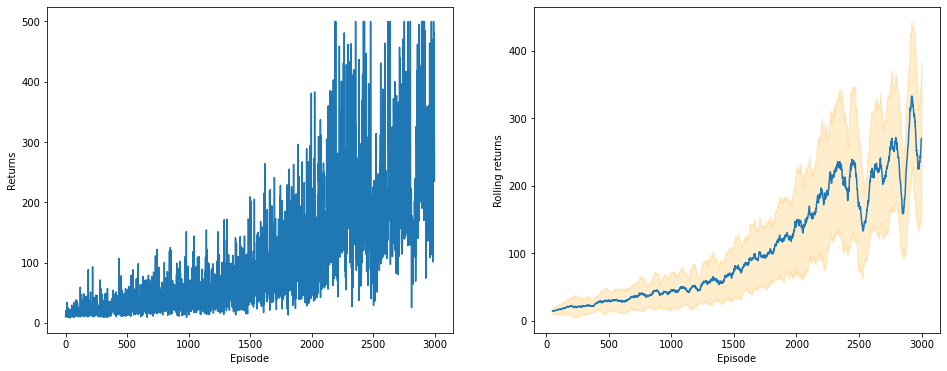

In [3]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

In [4]:
# train sutton's agent
sutton_agent = SuttonAgent(env_name='CartPole-v1')
history = sutton_agent.update_policy(
    max_episodes=3000,
    save_pth='saved_models/cartpole_reinforce_sutton.pth')

Episode: 100 | score: 41.450039631770956
Episode: 200 | score: 40.52381430343165
Episode: 300 | score: 29.181541755646027
Episode: 400 | score: 57.836533264527894
Episode: 500 | score: 43.70041618102584
Episode: 600 | score: 53.6027984489326
Episode: 700 | score: 47.11740758133685
Episode: 800 | score: 33.77219953757299
Episode: 900 | score: 109.09400844018774
Episode: 1000 | score: 155.7513242169026
Episode: 1100 | score: 102.94505705164217
Episode: 1200 | score: 88.34121407998163
Episode: 1300 | score: 100.05986171097241
Episode: 1400 | score: 110.49974445380653
Episode: 1500 | score: 115.43304855069741
Episode: 1600 | score: 159.1173048549586
Episode: 1700 | score: 135.70217221975958
Episode: 1800 | score: 152.2469305372222
Episode: 1900 | score: 150.04232694168311
Episode: 2000 | score: 148.95747628741412
Episode: 2100 | score: 168.6227162316152
Episode: 2200 | score: 144.1883895257969
Episode: 2300 | score: 137.01267128421588
Episode: 2400 | score: 56.2318847313834
Episode: 2500 |

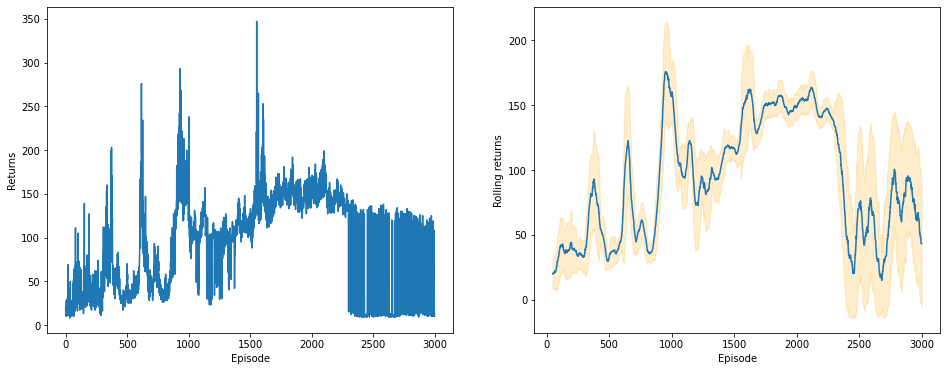

In [5]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(range(len(history)), history)
plt.xlabel('Episode')
plt.ylabel('Returns')

plt.subplot(1,2,2)
window = 50
rolling_mean = pd.Series(history).rolling(window).mean()
std = pd.Series(history).rolling(window).std()
plt.plot(rolling_mean)
plt.fill_between(range(len(history)),rolling_mean-std, rolling_mean+std, color='orange', alpha=0.2)
plt.xlabel('Episode')
plt.ylabel('Rolling returns')
plt.show()

From this basic experiment, it seems like both models can learn, although the returns are higher with the David's version of learning. One thing would be to run the trained agents on the game n number of times and comparing the returns generated by each agent

Things I don't understand right now:
1. One thing I found peculiar is that standardizing the rewards does wonders for David's version of the REINFORCE but when I standardize the rewards for Sutton's agent, the policy gradients explode leading to nan weights :/
2. I haven't tried changing the policy architecture, so will try different architectures as well